In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:24244): GLib-GIO-WARNING **: 10:46:13.902: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [50]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 0 ; 1 0 1; 0 1 0 ];
Y = [0 -1im 0 ; im 0 -im; 0 im 0];
Z = [1 0 0; 0 0 0; 0 0 -1 ];
S=  [0 1 0 ; 0 0 1; 1 0 0 ];

#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*S)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end



RZ (generic function with 1 method)

In [51]:
o=pi;
h=rand(6)*2*pi;
J=rand(6)*pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6])));


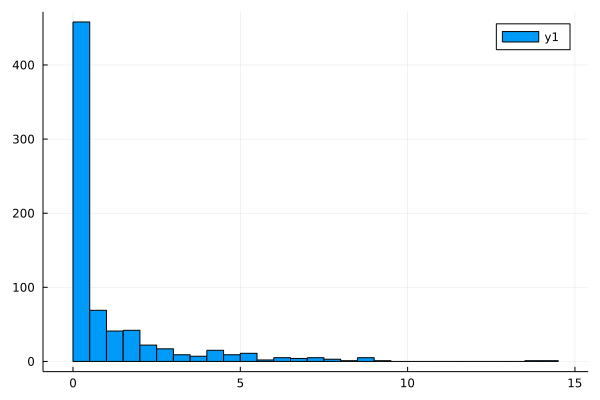

In [52]:
FU=fill(fill(0.1+im, 9,9), 5);

        
    
    for j in 1:length(FU)
      
       Lone=copy(kronecker(exp(im*J[j]*Z),I(3)));
       Ltwo=copy(kronecker(I(3),exp(im*J[j]*Z)));
    
    FU[j]=Lone*Ltwo;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3]));
    UEven=copy(kronecker(I(3),FU[4],FU[5],I(3)));


    A=XRow*UEven*UOdd
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

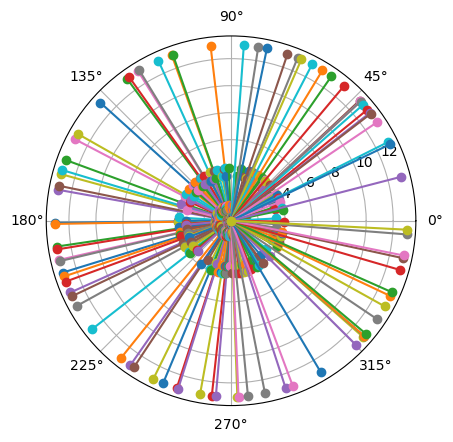

729-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x000000009EFE54B0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009EFE7EE0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009F00C880>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009F00C550>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009F00C070>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FD10040>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009EFCF9D0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FC7F580>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FC7E770>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FC7D7E0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009EFE5900>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FC7DAE0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000009FC7E6E0>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AF161D80>]
 [PyObject <ma

In [53]:

polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [7]:
Zi=fill(fill(0.1+im, 729,729), 6);



Zi[1]=copy(kronecker(Z,I(3),I(3),I(3),I(3),I(3)));
Zi[2]=copy(kronecker(I(3),Z,I(3),I(3),I(3),I(3)));
Zi[3]=copy(kronecker(I(3),I(3),Z,I(3),I(3),I(3)));
Zi[4]=copy(kronecker(I(3),I(3),I(3),Z,I(3),I(3)));
Zi[5]=copy(kronecker(I(3),I(3),I(3),I(3),Z,I(3)));
Zi[6]=copy(kronecker(I(3),I(3),I(3),I(3),I(3),Z));

In [20]:
Cii=fill(0.1, 6,25);

In [24]:
At=I(729);
for t in 1:25
   # for l in 1:12
        LM=copy(Zi[4]*At*Zi[4]);
        Cii[5,t]=real(LM[43,43]);
  #  end
    At=A*At;
end

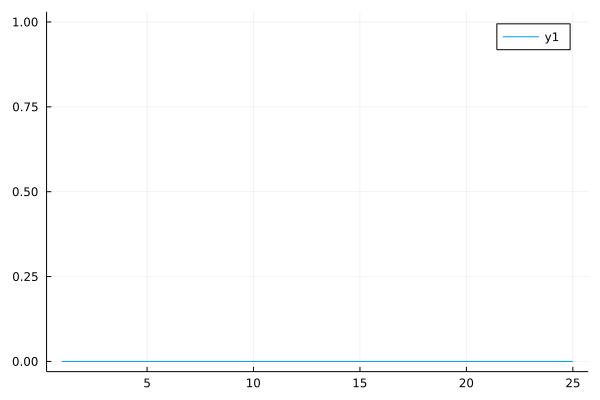

In [25]:
xax=1:25
Plots.plot(xax,Cii[5,:])

In [15]:
Zi[4]*A*Zi[4]

729×729 Matrix{ComplexF64}:
 -0.180134-2.59775im  0.212669+3.51576im   …   -2.58254+2.44198im
   1.52072+2.28234im  -2.43514-0.922408im      -2.80375-3.60203im
  -3.10485+1.66303im   2.70908-0.427267im       3.27881-0.798603im
   1.52072+2.28234im  -2.02966-3.10513im       -2.80375-3.60203im
  -2.58243-1.29407im   2.70908-0.427267im       4.94984-3.14071im
    1.9722-3.14193im  -2.25519+1.80491im   …   0.617223+4.28979im
  -3.10485+1.66303im   4.21932-2.21232im        3.27881-0.798603im
    1.9722-3.14193im  0.212669+3.51576im       0.617223+4.28979im
   3.77368+2.90799im  -2.02966-3.10513im       -3.07971-0.884266im
       0.0+0.0im           0.0+0.0im                0.0+0.0im
       0.0+0.0im           0.0+0.0im       …        0.0+0.0im
       0.0+0.0im           0.0+0.0im                0.0+0.0im
       0.0+0.0im           0.0+0.0im                0.0+0.0im
          ⋮                                ⋱  
       0.0+0.0im           0.0+0.0im                0.0+0.0im
       0.0+0.0im  

LoadError: UndefVarError: trace not defined